# "engender" -- Das Vokabular weiblicher und männlicher Autoren englischer Romane des 19. Jahrhunderts im Vergleich

Dieses Jupyter Notebook erläutert einige Aspekte des Vergleichs von Korpora.

Das Notebook heißt "engender.ipynb" and ist live unter: http://mybinder.org/repo/christofs/jupyter. Es wurde im Juni 2016 von Christof Schöch erstellt.


## 1. Einleitung

#### Das Thema dieser Lerneinheit

Hintergrund zu dieser Übung ist der Vortrag "Spitzer über Racine, revisited". Dort wurde unter anderem die Häufigkeit von lexikalischen Mustern in den Tragödien Racines und in Tragödien zeitgenössischer Autoren verglichen. 

Ganz ähnlich werden hier nun die Häufigkeiten von Lemmata in den Romanen weiblicher und männlicher englischer AutorInnen des 19. Jahrhunderts verglichen. 

Die verwendete Textsammlung besteht aus 70 Romanen, von denen 35 von Autorinnen und 35 von Autoren verfasst wurden. Einige besonders lange Romane sind in mehrere Teile aufgeteilt worden, sodass insgesamt 120 Dokumente vorhanden sind. Die Textsammlung umfasst etwa 16.7 Millionen Tokens.

#### Ziele der Lerneinheit

Erstens: An einem konkreten Beispiel selbst zu prüfen, ob Männer und Frauen sich in ihrem Sprachgebrauch unterscheiden. Aber Vorsicht! Von dem Beispiel der englischen Romane des 19. Jahrhunderts lässt sich nicht auf die heutige Zeit schließen!

Zweitens: Ein Verständnis dafür zu entwickeln, dass die Häufigkeiten von Wortformen oder Lemmata in den verschiedenen Texten einer Textsammlung als Verteilung verstanden werden kann.  

Drittens: Zu verstehen, welche Möglichkeiten dies eröffnet: Solche Verteilungen können visualisiert werden, ihre zentralen Eigenschaften können bestimmt werden, und sie können mit geeigneten statistischen Tests verglichen werden.

Viertens: Es geht darum, an konkreten Beispielen den Zusammenhang zwischen der Bedeutung eines Wortes, der Visualisierung seiner Verteilung und den statistischen Kennwerten zu erfahren. 

#### Einige Hinweise zu den Jupyter Notebooks

Das vorliegende Dokument ist ein Jupyter Notebook für Python. Es besteht aus Textfeldern und Code-Feldern. Die Code-Felder sind interaktiv, d.h. der enthaltene Code kann ausgeführt werden. Es können auch Veränderungen vorgenommen werden, die sich dann auf das Ergebnis auswirken. 

Eine Code-Zelle wird ausgeführt, indem man Strg+Enter drückt. Alternativ kann man auf das kleine "play"-Symbol in der Taskleiste oben klicken. 

Die Code-Zellen bauen aufeinander auf, d.h. sie müssen nacheinander ausgeführt werden.

Um noch einmal neu zu beginnen und alle Änderungen zu löschen, klickt man im Menü auf "Cell", dann ganz unten auf "All Output" und dann auf "Clear". 

Bevor es richtig losgehen kann, müssen die folgenden Erweiterungen für Python importiert (d.h., aktiviert) werden. Versuchen Sie gleich einmal, die erste Code-Zelle auszuführen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
%matplotlib inline

## 2. Start: Laden der Daten

Die für die folgenden Funktionen notwendigen Daten liegen bereits in einer Tabelle vor. Die Tabelle enthält für verschiedene Suchbegriffe die relativen Häufigkeiten in allen Texten der Sammlung.

Jede Zeile der Tabelle steht für einen Suchbegriff. Jede Spalte der Tabelle steht für einen Roman, der über ein Kürzel identifiziert ist. In jeder Zelle steht die relative Häufigkeit eines Suchbegriffs für einen Roman. (Die relative Häufigkeit ist die absolute Häufigkeit geteilt durch die Textlänge.)

Der folgende Code lädt die Datentabelle und zeigt einen kleinen Ausschnitt daraus an. 

In [69]:
DatenTabelle = "Data.csv"
with open(DatenTabelle, "r") as infile: 
    Daten = pd.DataFrame.from_csv(infile, sep=",")
    print(Daten.iloc[0:3,0:4])

               ABronte_Agnes  ABronte_Tenant  Austen_Emma  Austen_Mansfield
lemma_george        0.012335        0.004900     0.026298          0.005347
lemma_he            8.375788       11.255666     9.193855          8.207854
lemma_cecilia       0.000000        0.000000     0.000000          0.000000


Tatsächlich ist die Tablle natürlich viel größer. Sie hat 120 Spalten, eine Spalte für jeden Roman. 

Jetzt können wir genau die Daten auswählen, die uns im Moment interessieren. 

Erstens müssen wir hierfür wissen, welche Suchbegriffe in der Tabelle enthalten sind. Der folgende Code ruft die Liste der enthaltenen Suchbegriffe ab:

In [70]:
Suchbegriffe = Daten.index.values
print(Suchbegriffe)

['lemma_george' 'lemma_he' 'lemma_cecilia' 'lemma_of' 'lemma_feeling'
 'lemma_phineas' 'lemma_the' 'lemma_she' 'lemma_his' 'lemma_her']


Außerdem müssen wir festlegen, welche der Romane von Frauen und welche von Männern geschrieben wurden. Diese beiden langen Listen habe ich bereits vorbereitet. 

In [71]:
AlleRomane = ["ABronte_Agnes","ABronte_Tenant","Austen_Emma","Austen_Mansfield","Austen_Northanger","Austen_Persuasion","Austen_Pride","Austen_Sense","Bennet_Babylon","Bennet_Helen","Bennet_Imperial","Bennett_Agnes","Burney_Camilla","Burney_Cecilia","Burney_Darblay","Burney_Evelina","Burney_Wanderer","CBronte_Jane","CBronte_Professor","CBronte_Shirley","CBronte_Villette","Eliot_Adam","Eliot_Daniel","Eliot_Felix","Eliot_Middlemarch","Eliot_Mill","Eliot_Romola","Eliot_Silas","Gaskell_Barton","Gaskell_Lovers","Gaskell_NorthSouth","Gaskell_Ruth","Gaskell_Wives","Shelley_Frankenstein","Shelley_Lastman","Shelley_Valperga","Dickens_Bleak","Dickens_Cities","Dickens_Curiosity","Dickens_David","Dickens_Dombey","Dickens_Expectations","Dickens_Hard","Dickens_Mutual","Dickens_Nicholas","Dickens_Oliver","Doyle_TheHound","Doyle_TheLostWorld","Hardy_BlueEyes","Hardy_Greenwood","Hardy_Jude","Hardy_Madding","Hardy_Native","Hardy_Tess","Hardy_Woodlanders","Hawthorne_Blithedale","Hawthorne_MarbleFaun","Hawthorne_Scarlet","Hawthorne_SevenGables","Lytton_Barons","Lytton_Harold","Lytton_Pompeii","Lytton_Rienzi","Lytton_Zanoni","Thackeray_Barry","Thackeray_Pendennis","Thackeray_Vanity","Trollope_Barchester","Trollope_Forgive","Trollope_Phineas","Trollope_Prime","Trollope_Redux","Trollope_Thorne","Trollope_Warden"]
#random.shuffle(AlleRomane) 
RomaneW = AlleRomane[:36]
RomaneM = AlleRomane[36:]
#RomaneW = ["ABronte_Agnes","ABronte_Tenant","Austen_Emma","Austen_Mansfield","Austen_Northanger","Austen_Persuasion","Austen_Pride","Austen_Sense","Bennet_Babylon","Bennet_Helen","Bennet_Imperial","Bennett_Agnes","Burney_Camilla","Burney_Cecilia","Burney_Darblay","Burney_Evelina","Burney_Wanderer","CBronte_Jane","CBronte_Professor","CBronte_Shirley","CBronte_Villette","Eliot_Adam","Eliot_Daniel","Eliot_Felix","Eliot_Middlemarch","Eliot_Mill","Eliot_Romola","Eliot_Silas","Gaskell_Barton","Gaskell_Lovers","Gaskell_NorthSouth","Gaskell_Ruth","Gaskell_Wives","Shelley_Frankenstein","Shelley_Lastman","Shelley_Valperga"]
#RomaneM = ["Dickens_Bleak","Dickens_Cities","Dickens_Curiosity","Dickens_David","Dickens_Dombey","Dickens_Expectations","Dickens_Hard","Dickens_Mutual","Dickens_Nicholas","Dickens_Oliver","Doyle_TheHound","Doyle_TheLostWorld","Hardy_BlueEyes","Hardy_Greenwood","Hardy_Jude","Hardy_Madding","Hardy_Native","Hardy_Tess","Hardy_Woodlanders","Hawthorne_Blithedale","Hawthorne_MarbleFaun","Hawthorne_Scarlet","Hawthorne_SevenGables","Lytton_Barons","Lytton_Harold","Lytton_Pompeii","Lytton_Rienzi","Lytton_Zanoni","Thackeray_Barry","Thackeray_Pendennis","Thackeray_Vanity","Trollope_Barchester","Trollope_Forgive","Trollope_Phineas","Trollope_Prime","Trollope_Redux","Trollope_Thorne","Trollope_Warden"]

## 3. Wir wählen eine Suchanfrage aus

Auf der Grundlage der vorliegenden Daten können wir nun die relativen Häufigkeiten für einen Begriff und für die weiblichen bzw. die männlichen Autoren aus der Tabelle extrahieren.

Im folgenden Code-Feld muss ein Suchbegriff eingetragen werden. Bilden Sie zu einem der Suchbegriffe eine Hypothese und notieren Sie diese in der folgenden Code-Zelle. Dann machen Sie mit der Übung weiter. 

In [72]:
# Tragen Sie hier den Suchbegriff ein, zu dem Sie eine Hypothese haben.
Suchbegriff = "lemma_she" 

# Schreiben Sie hier in knapper Form Ihre Hypothese auf. 
Hypothese = "Ich vermute, dass für das Lemma of kein Unterschied zwischen den beiden Romangruppen besteht."

print("Hypothese zu "+Suchbegriff+": "+Hypothese)

Hypothese zu lemma_she: Ich vermute, dass für das Lemma of kein Unterschied zwischen den beiden Romangruppen besteht.


Jetzt nutzen wir die beiden Listen der Romane und den Suchbegriff, um die entsprechenden Werte aus der Datentabelle zu extrahieren.

In [73]:
WerteW = Daten.loc[Suchbegriff, RomaneW]
WerteM = Daten.loc[Suchbegriff, RomaneM]

print("\nWerteW\n", WerteW)
print("\nWerteM\n", WerteM)


WerteW
 ABronte_Agnes            7.685001
ABronte_Tenant           6.840622
Austen_Emma             11.855234
Austen_Mansfield        11.961543
Austen_Northanger       11.957441
Austen_Persuasion       11.707397
Austen_Pride            11.846098
Austen_Sense            11.013294
Bennet_Babylon           4.873060
Bennet_Helen            12.074150
Bennet_Imperial         11.749372
Bennett_Agnes            6.789486
Burney_Camilla          12.190064
Burney_Cecilia          12.568633
Burney_Darblay           6.254634
Burney_Evelina           5.744679
Burney_Wanderer         13.582642
CBronte_Jane             6.409083
CBronte_Professor        8.209012
CBronte_Shirley         11.191215
CBronte_Villette         8.103484
Eliot_Adam               9.127412
Eliot_Daniel             9.280665
Eliot_Felix              6.031730
Eliot_Middlemarch        7.026039
Eliot_Mill               8.007018
Eliot_Romola             6.196655
Eliot_Silas              4.799545
Gaskell_Barton          12.975970
Gaske

## 4. Visualisierung als Verteilungen

Die obigen Listen der Häufigkeiten sind etwas unübersichtlich. 

Zunächst visualisieren wir daher die beiden Verteilungen gemeinsam, um einen ersten Eindruck ihres Verhältnisses zueinander zu bekommen. Hierfür bieten sich sowohl Boxplots als auch Histogramme an.

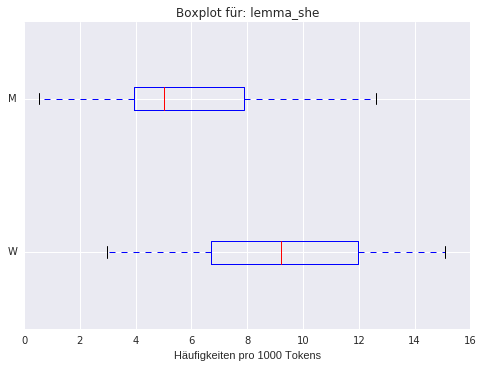

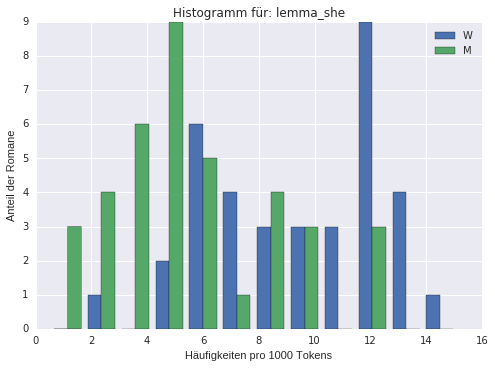

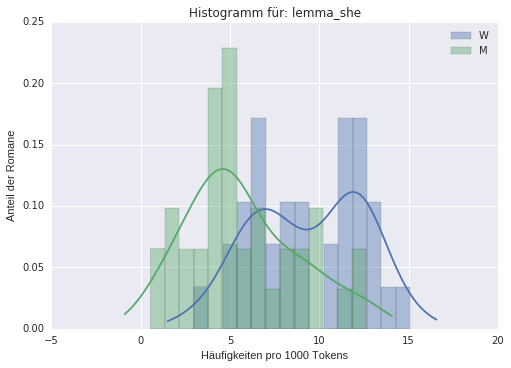

In [74]:
# Zwei Boxplots
Daten = [WerteW, WerteM]
plt.boxplot(Daten, vert=False)
plt.title("Boxplot für: "+str(Suchbegriff))
plt.xlabel("Häufigkeiten pro 1000 Tokens")
plt.yticks([1, 2], ['W', 'M'])
plt.show()

# Doppeltes Histogramm
plt.hist([WerteW,WerteM], 12, histtype="bar", label=["W","M"])
plt.title("Histogramm für: "+str(Suchbegriff))
plt.xlabel("Häufigkeiten pro 1000 Tokens")
plt.ylabel("Anteil der Romane")
plt.legend()
plt.show()
#plt.hist(WerteM, 12, histtype="bar", color=(0, 0, 1, 0.2))
#plt.show()

# Doppeltes Histogramm mit Dichteschätzung 
import seaborn as sns
sns.distplot(WerteW, rug=False, kde=True, bins=15, label="W")
sns.distplot(WerteM, rug=False, kde=True, bins=15, label="M")
plt.title("Histogramm für: "+str(Suchbegriff))
plt.xlabel("Häufigkeiten pro 1000 Tokens")
plt.ylabel("Anteil der Romane")
plt.legend()
plt.show()

## 5. Statistische Eigenschaften der Verteilungen

Verteilungen kann man durch bestimmte Kennwerte beschreiben. Für sehr viele Verteilungen sind der Mittelwert, der Median und die Standardabweichung wichtige Kennwerte. 

Das ist auch für die hier vorliegenden Verteilungen nützlich, allerdings sind sie durch diese Kennwerte allerdings nicht vollständig beschrieben.

#### 1. Mittelwerte

In [75]:
MittelW = np.mean(WerteW)
MittelM = np.mean(WerteM)
print("Mittelwert W:", MittelW, "\nMittelwert M:", MittelM)

Mittelwert W: 9.39424656249 
Mittelwert M: 5.71275278999


#### 2. Mediane

In [76]:
MedianW = np.median(WerteW)
MedianM = np.median(WerteM)
print("Median W:", MedianW)
print("Median M:", MedianM)

Median W: 9.2176530742
Median M: 5.0298397581


#### 3. Das Verhältnis der Mittelwerte / Mediane

In [77]:
VerhMittel = MittelW/MittelM
print("Verhältnis der Mittelwerte :", VerhMittel)
VerhMedian = MedianW/MedianM
print("Verhältnis der Mediane :", VerhMedian)

Verhältnis der Mittelwerte : 1.64443428726
Verhältnis der Mediane : 1.8325937838


#### 4. Standardabweichung

In [79]:
StandardabweichungW = np.std(WerteW)
StandardabweichungM = np.std(WerteM)
print("Standardabweichung W:", StandardabweichungW)
print("Standardabweichung M:", StandardabweichungM)

Standardabweichung W: 3.02177080009
Standardabweichung M: 3.04803066371


## 6. Statistische Tests

Jetzt können wir statistische Tests um zu prüfen, ob sich die Verteilungen signifikant unterscheiden oder nicht. Wir wenden der Einfachheit halber nur einen Test an, den Welch's t-Test. 

Mit diesem Test kann man die Null-Hypothese prüfen, dass zwei Verteilungen sich nicht signifikant unterscheiden. Das würde dann auch bedeuten, dass die beiden Verteilungen ebensogut zwei zufällige Samples aus ein und der Selben Verteilung sein könnten. 

In unserem Kontext entspricht die Null-Hypothese dem Befund, dass die Unterscheidung zwischen männlichen und weiblichen Autoren offenbar nicht wesentlich für die Häufigkeiten des Suchbegriffs ist. 

Ist der p-Wert des Tests sehr klein, bedeutet das, dass die Wahrscheinlichkeit, dass der beobachtete Unterschied zwischen den beiden Verteilungen durch eine Zufallsschwankung beim Sampeln aus einer einzigen Verteilung entstanden ist, sehr klein ist. Anders ausgedrückt: Wir können in einem solchen Fall die Null-Hypothese ablehnen uns den Schluss ziehen, dass sich die männlichen und weiblichen Romanautoren in der Verwendung des Suchbegriffs tatsächlich signifikant unterscheiden. 

#### 1. Der Welch's t-Test

Welch's t-Test ist geeignet für Fälle, in denen Mittelwert, Varianz und Länge zweier zu vergleichender Verteilungen unterschiedlich sind. Dies ist hier der Fall. Allerdings nimmt dieser Test auch an, dass die Verteilungen normalverteilt sind, d.h. eine Glockenform haben und nicht nach rechts oder links verzerrt sind. Davon kann hier nicht mit Sicherheit ausgegangen werden. 
 
Dokumentation: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html

In [81]:
Welch = stats.ttest_ind(WerteW, WerteM, equal_var=True)
print("Statistik:", Welch[0], "\n   P-Wert: ", Welch[1])

Statistik: 5.14401609345 
   P-Wert:  2.23266246346e-06


#### 2. Der Wilcoxon Rank-Sum Test

Dieser Test erfordert nicht, dass die Verteilungen normalverteilt sind und ist somit auf jeden Fall für unsere Daten geeignet.  

Dokumentation: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html

In [82]:
#Wilcoxon = stats.wilcoxon(WerteW, WerteM)
#print("Statistik:", Wilcoxon[0], "\n   P-Wert:", Wilcoxon[1])

Kolmogorov = stats.ks_2samp(WerteW, WerteM)
print("Statistik:", Kolmogorov[0], "\n   P-Wert:", Kolmogorov[1])


Statistik: 0.521929824561 
   P-Wert: 4.22334419497e-05
